# Starting Point

In [2]:
# upload dataset
from google.colab import files
upl = files.upload()

Saving heart_disease_2020_cleaned.csv to heart_disease_2020_cleaned.csv


In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score, recall_score

In [4]:
# read the data
df = pd.read_csv('heart_disease_2020_cleaned.csv')
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
# data description
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
# categorical features
df.select_dtypes(object).columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [7]:
# check for missing values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

#Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

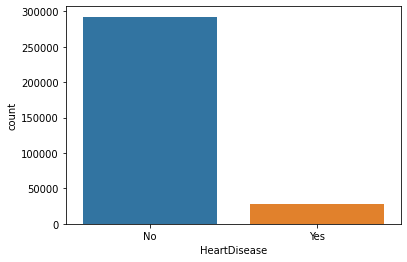

In [8]:
# Heart disease countplot
sns.countplot(df['HeartDisease']) 

In [9]:
df_plot = df.drop(columns=['BMI', 'HeartDisease'])

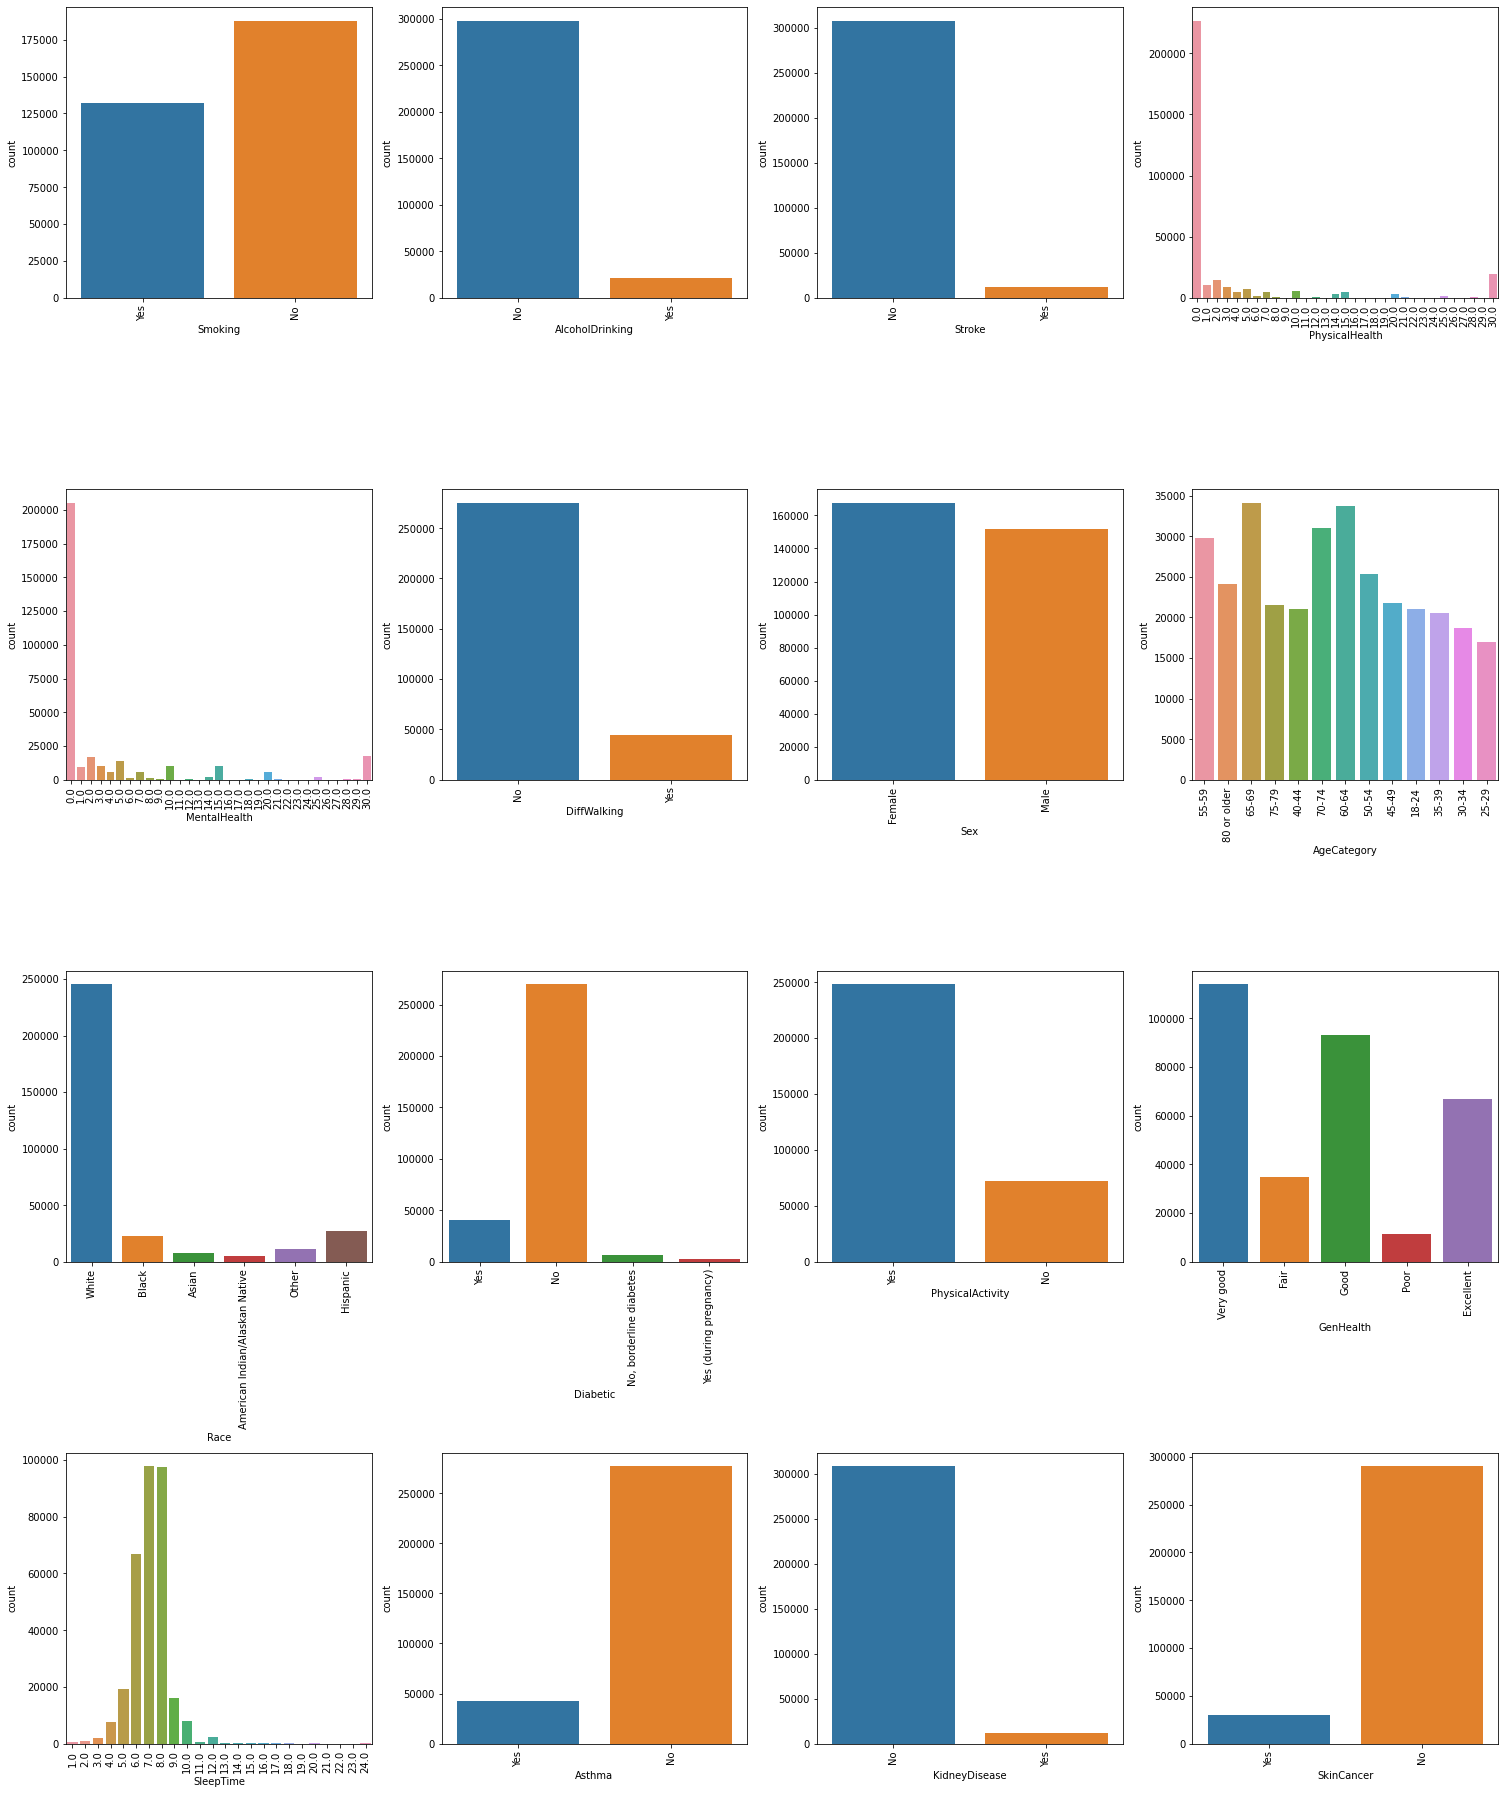

In [10]:
# countplot for features
plt.figure(figsize=(21,25))            # size of plot
for index, column in enumerate(df_plot):
  plt.subplot(4, 4, index+1)          # plot subplots
  sns.countplot(data=df_plot, x = column)  # plot counplot
  plt.xticks(rotation=90)             # rotate xlabels by 90 degrees

plt.tight_layout(pad = 1.0)
plt.show()

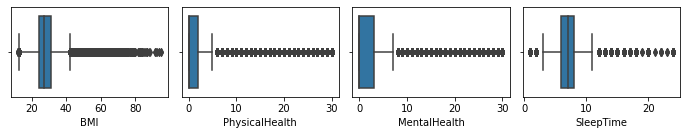

In [11]:
# boxplot for numeric features
df_plot_box = df.select_dtypes(include='number')
plt.figure(figsize=(12,7))            # size of plot
for index, column in enumerate(df_plot_box):
  plt.subplot(4, 5, index+1)          # plot subplots
  sns.boxplot(data=df_plot_box, x = column)  # plot counplot
plt.tight_layout(pad = 1.0)
plt.show()

**Off the bat points gotten from countplot visualization:**

1. Majority of the sample data are not affected by heart disease(unbalanced data).
2. In relation to smoking and alcohol drinking, majority of the people sampled were prone to smoking more than drinking alcohol.
3. For diseases such as kidney disease, asthma, diabetis,stroke and skin cancer majority of the sample had no presence of such, in fact most of them had a very good general health.
4. In regards to sleep, majority of the people sampled had between 7 - 8hrs of sleep.
5. As for the race feature, majority of people sampled were white.

# Data Preprocessing


In [12]:
# instantiate label encoder 
lc = LabelEncoder()

# get categorical columns
df_cat = df.select_dtypes(exclude='number').columns

# encode
for i in df_cat:
  df[i] = lc.fit_transform(df[i])
# display encoded df
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


<AxesSubplot:>

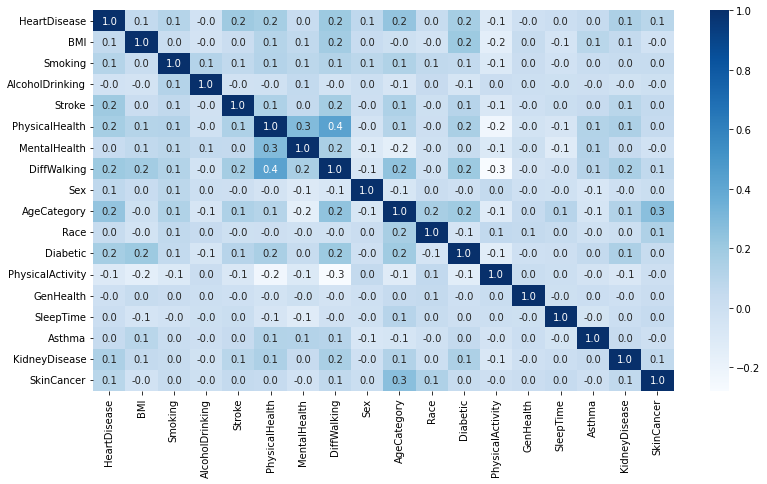

In [13]:
# correlation matrix
kor = df.corr()

# corelation heatmap
plt.figure(figsize=(13,7))                                # heatmap size
sns.heatmap(kor,annot=True, fmt='.1f', cmap='Blues')

# Splitting, Smote for dealing with data balance and Standardizing Data

In [14]:
# copy of original dataframe
df2 = df.copy()

In [15]:
# get target variable
target = df['HeartDisease']
features = df.drop(columns=['HeartDisease'])

# split data
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=.2, random_state=69)

**NB:** Always perform smote balancing on the train test after splitting the data

## OverSample

In [16]:
# instantiate Smote 
sm = SMOTE(random_state=69, sampling_strategy=1)
X_train_over, Y_train_over = sm.fit_resample(X_train, Y_train) # resample
# display train samples
print(X_train_over.shape)
print(Y_train_over.shape)

(467726, 17)
(467726,)


In [17]:
# scaling
Sc = StandardScaler()
x_train_over_scaled = Sc.fit_transform(X_train_over)
x_test_scaled = Sc.transform(X_test)

# Modeling Oversampled Data


In [18]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train_over_scaled, Y_train_over)
log_pred = logreg.predict(x_test_scaled)

# evaluate performance

log_score = accuracy_score(Y_test, log_pred)
f1_val = f1_score(Y_test, log_pred)
recall_val = recall_score(Y_test, log_pred)
print('Algorithm accuracy:',log_score)
print('F1 score:',f1_val)
print('Recall score:',recall_val)


Algorithm accuracy: 0.7036226332494254
F1 score: 0.2865100873230954
Recall score: 0.7048148148148148


In [19]:
# random forest
rfc = RandomForestClassifier()
rfc.fit(x_train_over_scaled, Y_train_over)
rfc_pred = rfc.predict(x_test_scaled)


rfc_score = accuracy_score(Y_test, rfc_pred)
f1_val = f1_score(Y_test, rfc_pred)
recall_val = recall_score(Y_test, rfc_pred)


print('Algorithm accuracy:',rfc_score)
print('F1 score:',f1_val)
print('Recall score:',recall_val)

Algorithm accuracy: 0.8530308478869275
F1 score: 0.25396825396825395
Recall score: 0.2962962962962963


In [20]:
# Xgboost
xgb = XGBClassifier()

xgb.fit(x_train_over_scaled, Y_train_over)
xgb_pred = xgb.predict(x_test_scaled)


xgb_score = accuracy_score(Y_test, xgb_pred)
f1_val = f1_score(Y_test, xgb_pred)
recall_val = recall_score(Y_test, xgb_pred)


print('Algorithm accuracy:',xgb_score)
print('F1 score:',f1_val)
print('Recall score:',recall_val)

Algorithm accuracy: 0.8381619474976156
F1 score: 0.3080419814158701
Recall score: 0.4266666666666667


# Undersampling

In [21]:
# get target variable
target_under = df2['HeartDisease']
feature_under = df2.drop(columns=['HeartDisease'])

# #split the data
X_train_under, X_test_under, Y_train_under, Y_test_under = train_test_split(features, target, test_size=.2, random_state=69)

In [22]:
# instantiate
rus = RandomUnderSampler(random_state=69, sampling_strategy=1)
X_train, Y_train = rus.fit_resample(X_train_under, Y_train_under) # resample
# display train samples
print(X_train.shape)
print(Y_train.shape)

(43946, 17)
(43946,)


In [23]:
# scaling
X_train_under_scaled = Sc.fit_transform(X_train)
x_test_under_scaled = Sc.transform(X_test_under)

## Modeling Undersampled data

In [24]:
# logistic regression
logreg_under = LogisticRegression()
logreg_under.fit(X_train_under_scaled, Y_train)
log_pred_under = logreg_under.predict(x_test_under_scaled)

# evaluate
log_score_under = accuracy_score(Y_test_under, log_pred_under)
f1_val_under = f1_score(Y_test_under, log_pred_under)
recall_val_under  = recall_score(Y_test_under, log_pred_under)
print('Algorithm accuracy:',log_score_under)
print('F1 score:',f1_val_under)
print('Recall score:',recall_val_under)


Algorithm accuracy: 0.741881517847371
F1 score: 0.33272705226142846
Recall score: 0.7622222222222222


In [25]:
# random forest
rfc_under = RandomForestClassifier()
rfc_under.fit(X_train_under_scaled, Y_train)
rfc_pred_under = rfc_under.predict(x_test_under_scaled)

rfc_score_under = accuracy_score(Y_test_under, rfc_pred_under)
f1_val_under = f1_score(Y_test_under, rfc_pred_under)
recall_val_under  = recall_score(Y_test_under, rfc_pred_under)

print('Algorithm accuracy:',rfc_score_under)
print('F1 score:',f1_val_under)
print('Recall score:',recall_val_under)

Algorithm accuracy: 0.718600978752013
F1 score: 0.31768898324361206
Recall score: 0.7759259259259259


In [26]:
#Xgboost on undersampled data
xgb2 = XGBClassifier()
xgb2.fit(X_train_under_scaled, Y_train)
xgb_pred2 = xgb2.predict(x_test_under_scaled)


xgb2_score = accuracy_score(Y_test_under, xgb_pred2)
f1_val = f1_score(Y_test_under, xgb_pred2)
recall_val = recall_score(Y_test_under, xgb_pred2)


print('Algorithm accuracy:',xgb2_score)
print('F1 score:',f1_val)
print('Recall score:',recall_val)

Algorithm accuracy: 0.7311558967463532
F1 score: 0.33370790870693995
Recall score: 0.7974074074074075


# Discussion



1. It is recommended to apply oversampling or undersampling on the training set attained after splitting the dataset(train, test)

2. For imbalanced datasets the best metric for model evaluation is the F1-score.The F1 score keeps the balance between precision and recall and improves the score only if the classifier identifies more of a certain class correctly.

3. In regards to choice of algorithm to model, tree based models perform well on imbalanced datasets not forgetting boosing algorithms which are aslo ideal for dealing with imbalanced datasets.
